In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import (Adam,
                              SGD)

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pandas as pd

In [11]:
exact_data = pd.read_excel("../UNT-Thermography-24/fused_silica_data/fused_silica_exact_train.xlsx")

exact_df = pd.DataFrame(exact_data)

X = exact_df[exact_df.columns[11:]]

Y = exact_df[exact_df.columns[0:11]]

print(f"The original data set has {exact_df.shape[0]} rows, and {exact_df.shape[1]} columns. "
      f"We want to predict {Y.shape[1]} output variables from {X.shape[1]} features")

exact_df.head()

The original data set has 10000 rows, and 77 columns. We want to predict 11 output variables from 66 features


layer 1     layer 2     layer 3     layer 4     layer 5     layer 6  \
0  312.355087  301.649641  321.270850  324.903956  329.245296  337.694194   
1  308.045992  314.390077  319.612686  324.021871  328.286597  324.268581   
2  275.470643  334.023614  330.292063  333.180051  317.824092  306.451798   
3  319.154096  314.324236  322.541381  324.154848  333.263850  344.199198   
4  368.613557  330.588867  323.002818  322.824169  336.505619  328.080745   

      layer 7     layer 8     layer 9    layer 10  ...      0.000008  \
0  333.776774  333.750946  331.605971  333.828275  ...  2.378753e-12   
1  318.045216  310.205743  316.395558  315.206667  ...  4.690686e-12   
2  309.091647  312.060959  320.208051  336.027107  ...  2.891349e-12   
3  338.490892  334.185374  327.065180  303.761845  ...  1.335647e-12   
4  325.609686  335.941694  328.415271  330.880143  ...  2.861867e-12   

       0.000008      0.000008      0.000008      0.000008      0.000008  \
0  2.416740e-12  2.452565e-12  2.482976e-12  2.505710e-12  2.514345e-12   
1  4.758857e-12  4.814785e-12  4.855500e-12  4.879557e-12  4.876002e-12   
2  2.935824e-12  2.976514e-12  3.009965e-12  3.033863e-12  3.040662e-12   
3  1.361978e-12  1.387258e-12  1.409588e-12  1.427626e-12  1.437648e-12   
4  2.906931e-12  2.947792e-12  2.981218e-12  3.005087e-12  3.012002e-12   

       0.000008      0.000008      0.000008      0.000008  
0  2.497372e-12  2.443515e-12  2.360022e-12  2.283099e-12  
1  4.823191e-12  4.700047e-12  4.521287e-12  4.356649e-12  
2  3.016554e-12  2.948046e-12  2.844024e-12  2.748188e-12  
3  1.432962e-12  1.406923e-12  1.363502e-12  1.323517e-12  
4  2.988298e-12  2.920602e-12  2.817710e-12  2.722916e-12  

[5 rows x 77 columns]

In [12]:
#Normalize features
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
#Goal: Using keras to implement a feed-forward neural network to predict temperatures of each layer given wavelength spectrum
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled_df, Y, train_size = .8, random_state = 1337)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state = 1337)

print(
    f"Using {len(Y_train)} samples for training, "
    f"and {len(Y_test)} for testing "
    f"from {len(X_test) + len(X_train)} total samples."
)

Using 6400 samples for training, and 2000 for testing from 8400 total samples.


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - loss: 31249.4199 - mae: 139.9213 - val_loss: 185.0684 - val_mae: 10.0268
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 179.6241 - mae: 9.8079 - val_loss: 210.9301 - val_mae: 10.9443
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 199.9974 - mae: 10.5114 - val_loss: 174.9235 - val_mae: 9.6326
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 303.2933 - mae: 12.7082 - val_loss: 207.9056 - val_mae: 10.7795
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 178.3804 - mae: 9.7764 - val_loss: 147.7928 - val_mae: 8.5612
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 164.1181 - mae: 9.2459 - val_loss: 149.6993 - val_mae: 8.6745
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 189.7768 - mae: 10.1524 - val_loss: 156.6319 - val_mae: 8.6712
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 274.5594 - mae: 12.1146 - val_loss: 146.6131 - val_mae: 8.48

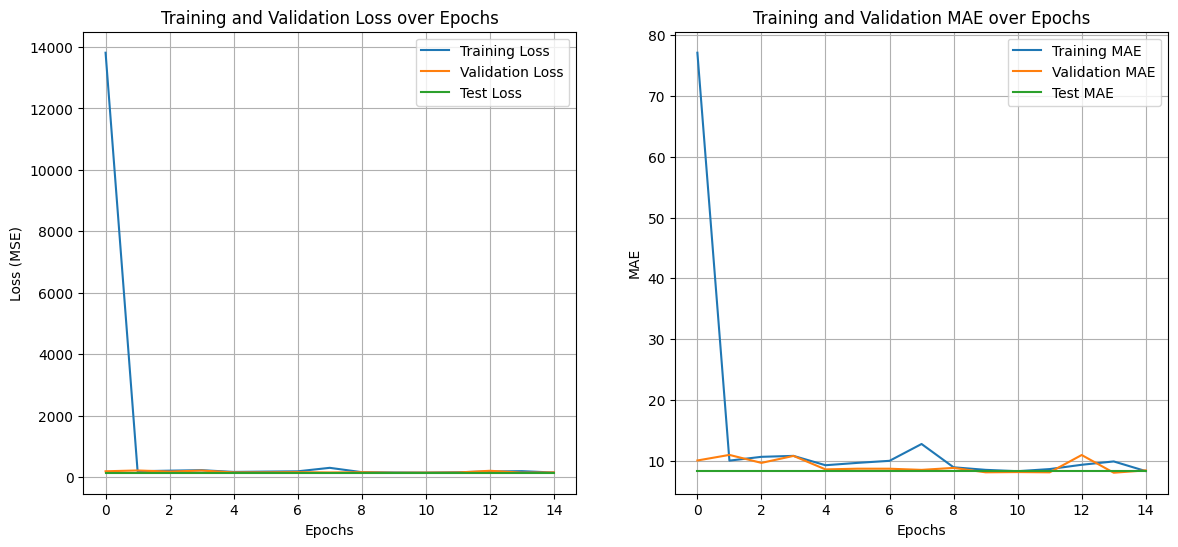

In [17]:
# Define the input shape
input_layer = keras.Input(shape=(X_train.shape[1],))

#Define the model (add more layers? increase nodes?)
exact_model = keras.Sequential([input_layer, #input_layer --> informs input shape
    Dense(256, activation="relu"), # first hidden layer
    Dense(128, activation="relu"), # second hidden layer
    # layers.Dense(20, activation="relu"), # third hidden layer
    # layers.Dense(20, activation="relu"), # fourth hidden layer
    Dense(11)  # Output layer with 11 neurons for each temperature target
])

# Compile the model
# Instantiate optimizer with adjustable learning rate
# observed: sweet spot .02 > x > .001
Adam1 = Adam(learning_rate = 0.009)
sgd = SGD(learning_rate = 0.009)

# Leverage both MSE and MAE (experimental)
# test different optimizers: SGD (*stochastic gradient descent: better for large data sets)
exact_model.compile(loss="mse", optimizer=Adam1, metrics=["mae"])  # Loss: MSE, Optimizer: Adam w/ MAE

# Train the model
# Thoughts: Overfit then implement regularization
# play around with batch size: batch size for larger datasets more likely to improve its performance
# Dima went up to 60 epochs for GaN_exact: later 600 -> imrpovement plateaus around 120 epochs
# plot loss over epochs
history = exact_model.fit(X_train, Y_train, epochs=15, validation_data = [X_val, Y_val])

#View Training Error
print(f"train_MSE: {history.history["loss"]}")
print(f"train_MAE: {history.history.get("mae", None)}")

# Evaluate the model on the validation set (separate call)
validation_loss, validation_accuracy = exact_model.evaluate(X_val, Y_val)

print(f"val_MSE: {validation_loss}, val_MAE: {validation_accuracy}")

test_loss, test_mae = exact_model.evaluate(X_test, Y_test)

print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()




In [15]:
# Evaluate the model on unseen data
loss, mae = exact_model.evaluate(X_test, Y_test)
print("test_MSE:", loss)
print("test_MAE:", mae)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 149.3885 - mae: 8.7318
test_MSE: 148.90750122070312
test_MAE: 8.779891967773438


# TODO:
* plot predictions against actual (scatter plot to see if similar)

* m nodes by n layers: want m*n to be less than number of data points
* per layer residual
* avg (above) to get overall residual
* plot error over epochs
* increase layers: implement loop
* change activation function to hyperbolic tangent: (theoretical difference: ReLu 0 and 1, tangent maintains 
* positive and negative (if normalized data is positive and negative, it is possible tanegent would work 
* better (consider what might happen if all data is positive)))
* 20 layers 250 nodes, batch size 15, epochs 220
* learning rate vs momenta/momento?? may reduce epochs

# Reading in MATLAB data

In [8]:
import scipy.io
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')
Temp_all = mat.get('T_GaN_random')
Spectra_all = mat.get('Spectrum')

In [49]:
Spectra_all.shape

(10000, 71)

In [47]:
Temp_all.shape

(10000, 10)

In [55]:
# Temp_all = mat.get('T_GaN_random')
# temp_2d = Temp_all.reshape(10000, 10)
# temp_2d

# Spectra_all = mat.get('Spectrum')
# spectra_2d = Spectra_all.reshape(10000, 71)
# spectra_2d

array([[354.47236864, 327.07393371, 372.70032716, ..., 365.58379889,
        365.68595734, 300.45984349],
       [291.33367062, 347.78170911, 277.75341942, ..., 303.99897837,
        322.21712593, 347.18597075],
       [356.00771737, 349.67975325, 342.13936962, ..., 331.32114696,
        357.47165997, 287.90707088],
       ...,
       [280.3720307 , 280.07243342, 280.70569281, ..., 280.37762327,
        280.44602254, 280.57300082],
       [280.85295468, 280.33695585, 280.44436814, ..., 280.28859155,
        280.62967699, 280.71671492],
       [280.83054536, 280.61342534, 280.60436592, ..., 280.66774841,
        280.34940325, 280.70790655]])

In [60]:
Temp_all = mat.get('T_GaN_random')
temp_2d = Temp_all.reshape(10000, 10)
temp_2d.shape

Spectra_all = mat.get('Spectrum')
spectra_2d = Spectra_all.reshape(10000, 71)
spectra_2d.shape

pd_spectra = pd.DataFrame(spectra_2d)
pd_temp = pd.DataFrame(temp_2d)

X = pd_spectra.iloc[0:10000]
Y = pd_temp.iloc[0:10000]


# Neural Network with MATLAB Data

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - loss: 70504.7500 - mae: 250.3013 - val_loss: 21799.7207 - val_mae: 122.0443
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 21817.9004 - mae: 123.0166 - val_loss: 19171.5645 - val_mae: 114.6984
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 17560.3418 - mae: 109.5265 - val_loss: 2285.5996 - val_mae: 39.8644
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 921.3091 - mae: 23.6363 - val_loss: 476.0650 - val_mae: 18.0391
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 513.5488 - mae: 18.3135 - val_loss: 417.5110 - val_mae: 16.6435
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 470.3560 - mae: 17.6375 - val_loss: 452.1541 - val_mae: 17.3371
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 449.4336 - mae: 17.3942 - val_loss: 450.9322 - val_mae: 17.4223
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 448.3783 - mae: 17.3550 - val_loss: 406.

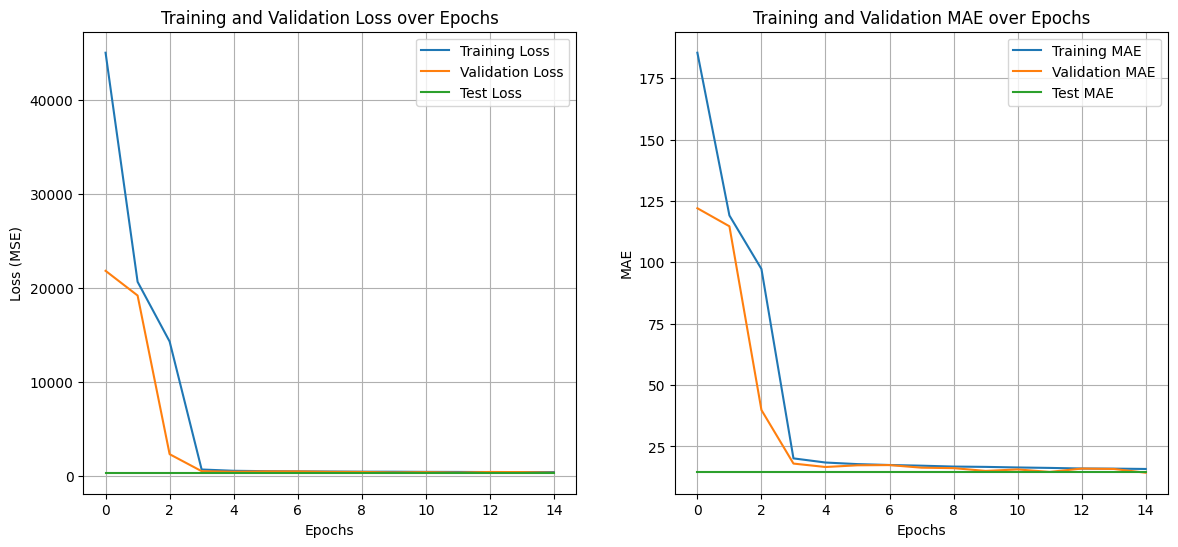

In [75]:
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import (Adam,
                              SGD)

# Load MATLAB file
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')
Temp_all = mat.get('T_GaN_random')
temp_2d = Temp_all.reshape(10000, 10)
temp_2d.shape

Spectra_all = mat.get('Spectrum')
spectra_2d = Spectra_all.reshape(10000, 71)
spectra_2d.shape

pd_spectra = pd.DataFrame(spectra_2d)
pd_temp = pd.DataFrame(temp_2d)

X = pd_spectra.iloc[0:10000]
Y = pd_temp.iloc[0:10000]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=1337)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337)


# Define the model
input_layer = keras.Input(shape=(X_train.shape[1],))

model = keras.Sequential([input_layer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10)
])


# Compile the model
Adam1 = Adam(learning_rate = 0.009)
sgd = SGD(learning_rate = 0.001, clipvalue=1.0)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data = [X_val, y_val])

print(f"train_MSE: {history.history["loss"]}")
print(f"train_MAE: {history.history.get("mae", None)}")

# Evaluate the model on the validation set (separate call)
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print(f"val_MSE: {validation_loss}, val_MAE: {validation_accuracy}")

test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58733.2695 - mae: 219.3955 - val_loss: 24211.8125 - val_mae: 128.3524
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 22197.3496 - mae: 124.6423 - val_loss: 22575.2363 - val_mae: 124.5949
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 22721.1328 - mae: 125.8392 - val_loss: 22610.1074 - val_mae: 126.1094
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 20645.8770 - mae: 118.9882 - val_loss: 18968.8555 - val_mae: 112.7848
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 16505.2676 - mae: 106.4953 - val_loss: 9691.8779 - val_mae: 78.9414
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 7206.4268 - mae: 67.4320 - val_loss: 1693.9681 - val_mae: 29.8941
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 2623.3892 - mae: 39.5485 - val_loss: 1433.8098 - val_mae: 29.6275
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 1699.4001 - mae: 31.3312 - val_loss: 525.9

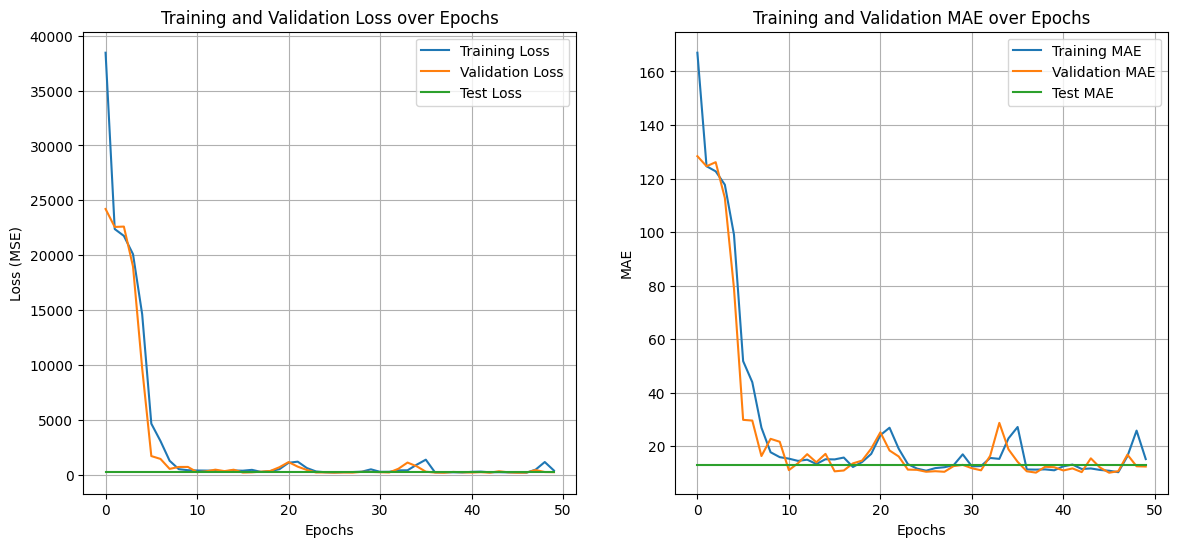

In [83]:
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import (Adam,
                              SGD)


mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')
Temp_all = mat.get('T_GaN_random')
temp_line = Temp_all.reshape(2000, 50)
temp_line.shape

Spectra_all = mat.get('Spectrum')
spectra_line = Spectra_all.reshape(2000, 355)
spectra_line.shape

pd_spectra = pd.DataFrame(spectra_line)
pd_temp = pd.DataFrame(temp_line)

X = pd_spectra.iloc[0:2000]
Y = pd_temp.iloc[0:2000]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=1337)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337)

input_layer = keras.Input(shape=(X_train.shape[1],))

model = keras.Sequential([input_layer,
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(50)
])

Adam1 = Adam(learning_rate = 0.009)
sgd = SGD(learning_rate = 0.001, clipvalue=1.0)
model.compile(optimizer=Adam1, loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data = [X_val, y_val])

print(f"train_MSE: {history.history["loss"]}")
print(f"train_MAE: {history.history.get("mae", None)}")

# Evaluate the model on the validation set (separate call)
validation_loss, validation_accuracy = model.evaluate(X_val, y_val)

print(f"val_MSE: {validation_loss}, val_MAE: {validation_accuracy}")

test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()




# Current Neural Network

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 97508.2734 - mae: 311.9128 - val_loss: 97580.4609 - val_mae: 312.0776 - learning_rate: 1.0000e-04
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97814.6406 - mae: 312.4096 - val_loss: 97314.4375 - val_mae: 311.6509 - learning_rate: 1.0000e-04
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97006.0938 - mae: 311.1180 - val_loss: 96794.0625 - val_mae: 310.8130 - learning_rate: 1.0000e-04
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96149.1016 - mae: 309.7285 - val_loss: 95846.8828 - val_mae: 309.2776 - learning_rate: 1.0000e-04
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95106.9219 - mae: 308.0485 - val_loss: 94181.7500 - val_mae: 306.5484 - learning_rate: 1.0000e-04
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93235.6797 - mae: 304.9544 - val_loss: 91430.0078 - val_mae: 301.9513 - learning_rate: 1.0000e-04
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

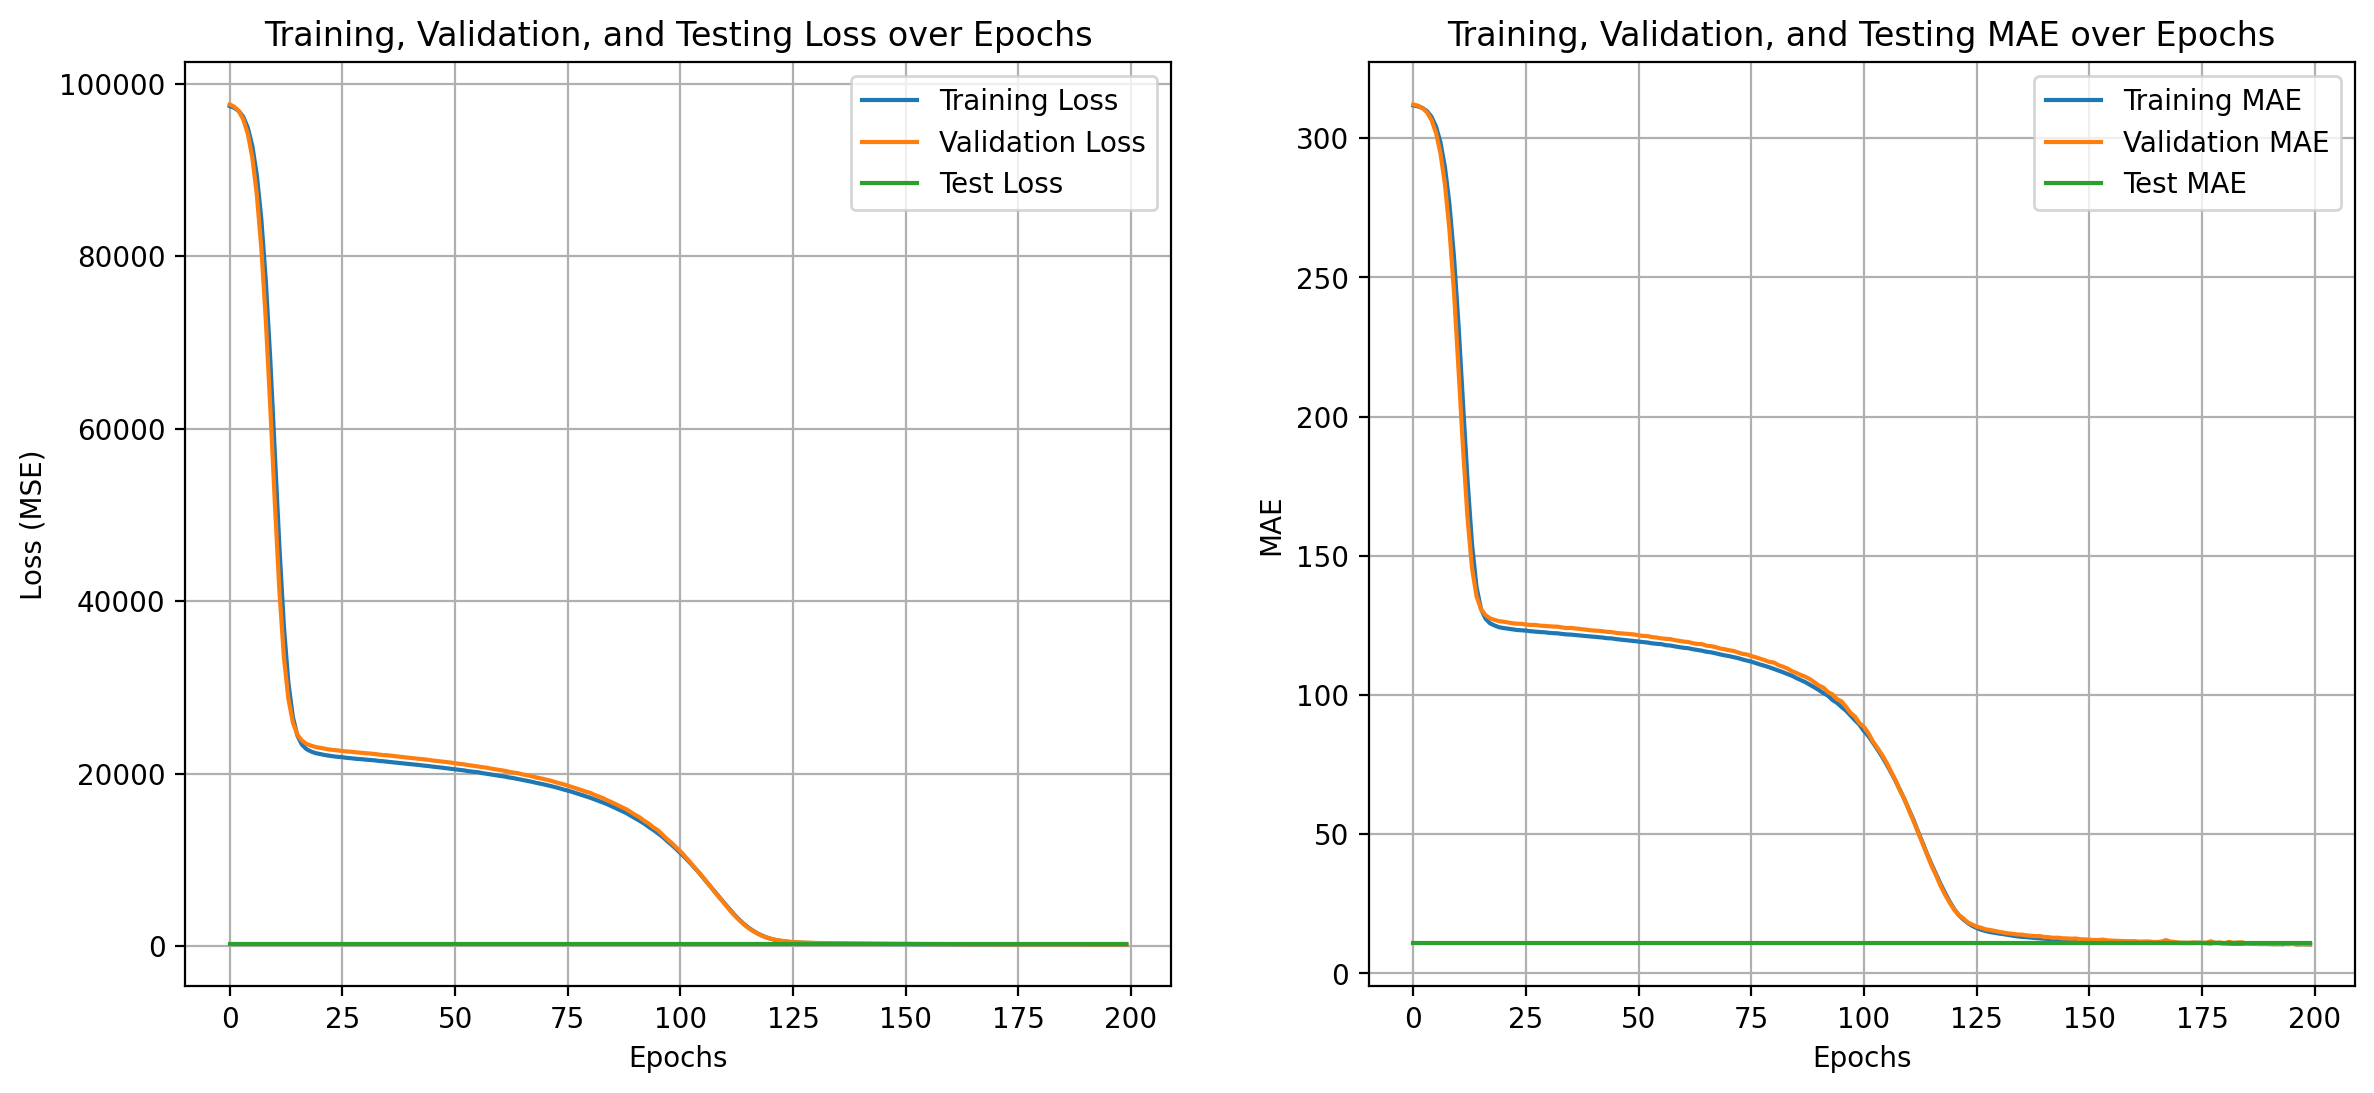

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


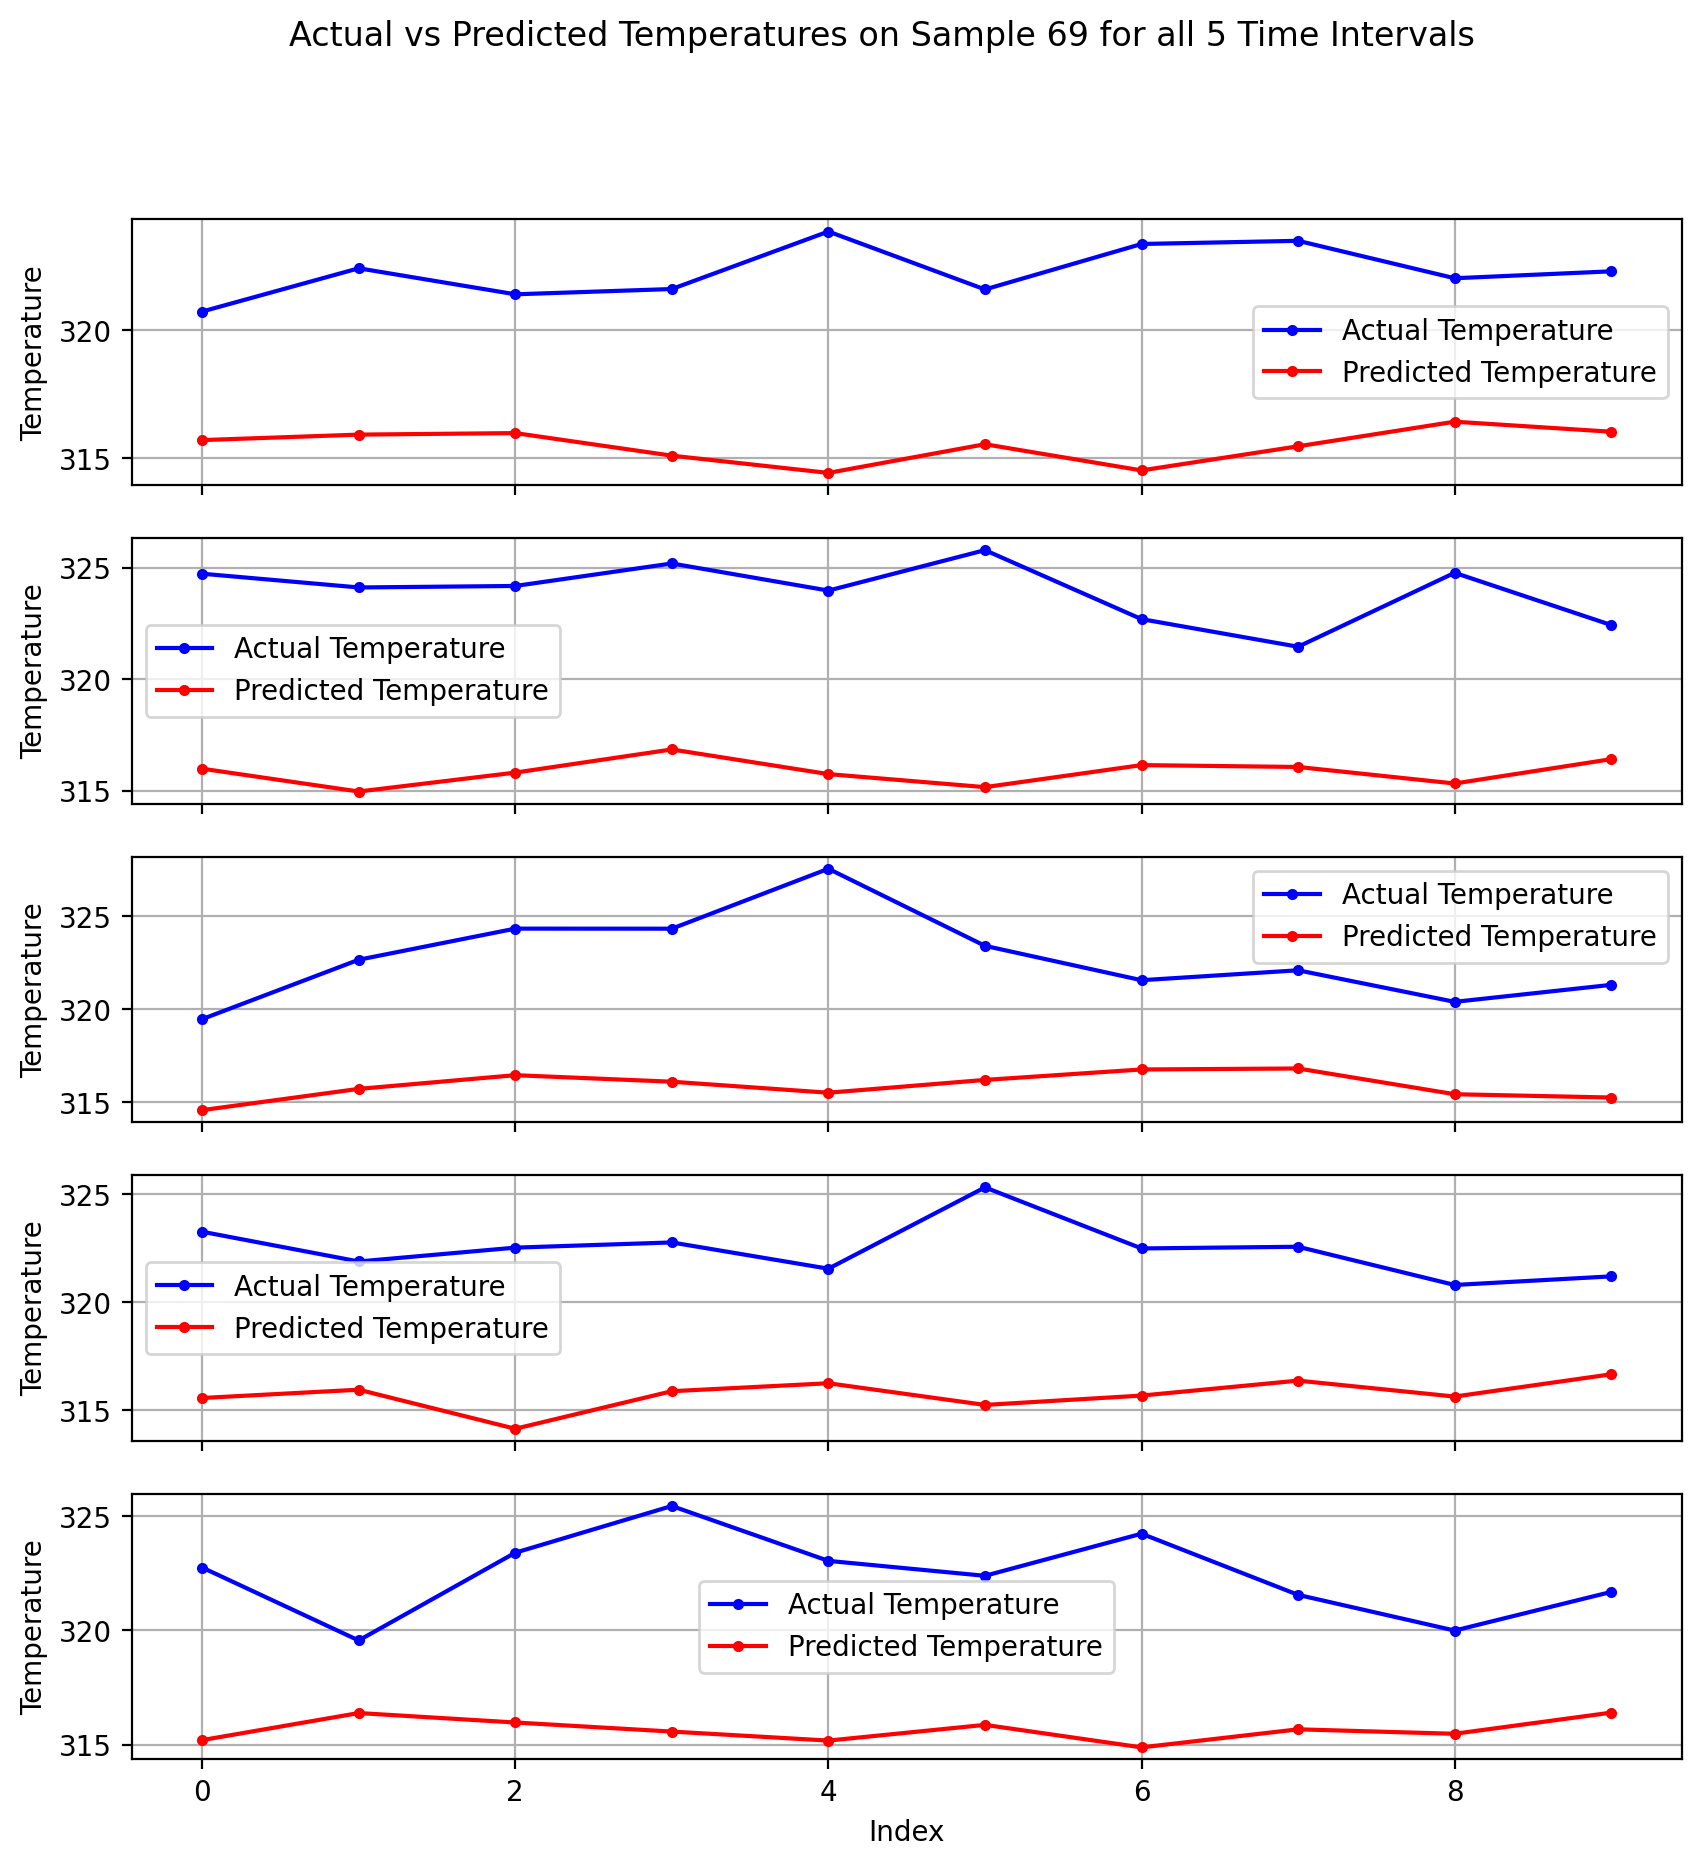

In [146]:
import scipy.io
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load .mat file
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')

# Extract and reshape data
Temp_all = mat.get('T_GaN_random')
temp_line = Temp_all.reshape(2000, 50)

Spectra_all = mat.get('Spectrum')
spectra_line = Spectra_all.reshape(2000, 355)

# Create pandas DataFrame
pd_spectra = pd.DataFrame(spectra_line)
pd_temp = pd.DataFrame(temp_line)

# Select the data
X = pd_spectra.iloc[0:2000]
Y = pd_temp.iloc[0:2000]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size=0.2, random_state=1337)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337)

# Define the model
input_layer = Input(shape=(X_train.shape[1],))

# Split input into 5 groups of 71 features
grouped_inputs = [Dense(71, activation="relu")(input_layer[:, i*71:(i+1)*71]) for i in range(5)]

# Define dense layers for each group
grouped_denses = [Dense(64, activation="relu")(group) for group in grouped_inputs]
grouped_denses = [Dense(32, activation="relu")(group) for group in grouped_inputs]
grouped_denses = [Dense(16, activation="relu")(group) for group in grouped_denses]

# Concatenate the outputs of the dense layers
concat = Concatenate()(grouped_denses)

# Output layer to match the 5 groups of 10
output_layer = Dense(50)(concat)

# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)

Adam1 = Adam(learning_rate=0.0001)
sgd = SGD(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=Adam1, loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])


# model.save('temperature_prediction_model.h5')

# Print training metrics
print(f"train_MSE: {history.history['loss']}")
print(f"train_MAE: {history.history.get('mae', None)}")

# Evaluate the model on the validation set
validation_loss, validation_mae = model.evaluate(X_val, y_val)
print(f"val_MSE: {validation_loss}, val_MAE: {validation_mae}")

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

# Add test metrics to the history for plotting
history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training, Validation, and Testing Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training, Validation, and Testing MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()


# Make predictions on the test set
y_pred = model.predict(X_test)

# Select a random index for a 5x10 segment
random_index = np.random.randint(0, len(y_test))
actual_segment = y_test.iloc[random_index].values.reshape(5, 10)
predicted_segment = y_pred[random_index].reshape(5, 10)

# Plot the selected segments
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)
for i in range(5):
    axs[i].plot(range(10), actual_segment[i], 'b.-', label='Actual Temperature')
    axs[i].plot(range(10), predicted_segment[i], 'r.-', label='Predicted Temperature')
    axs[i].set_ylabel('Temperature')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Index')
plt.suptitle(f"Actual vs Predicted Temperatures on Sample {random_index} for all 5 Time Intervals")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


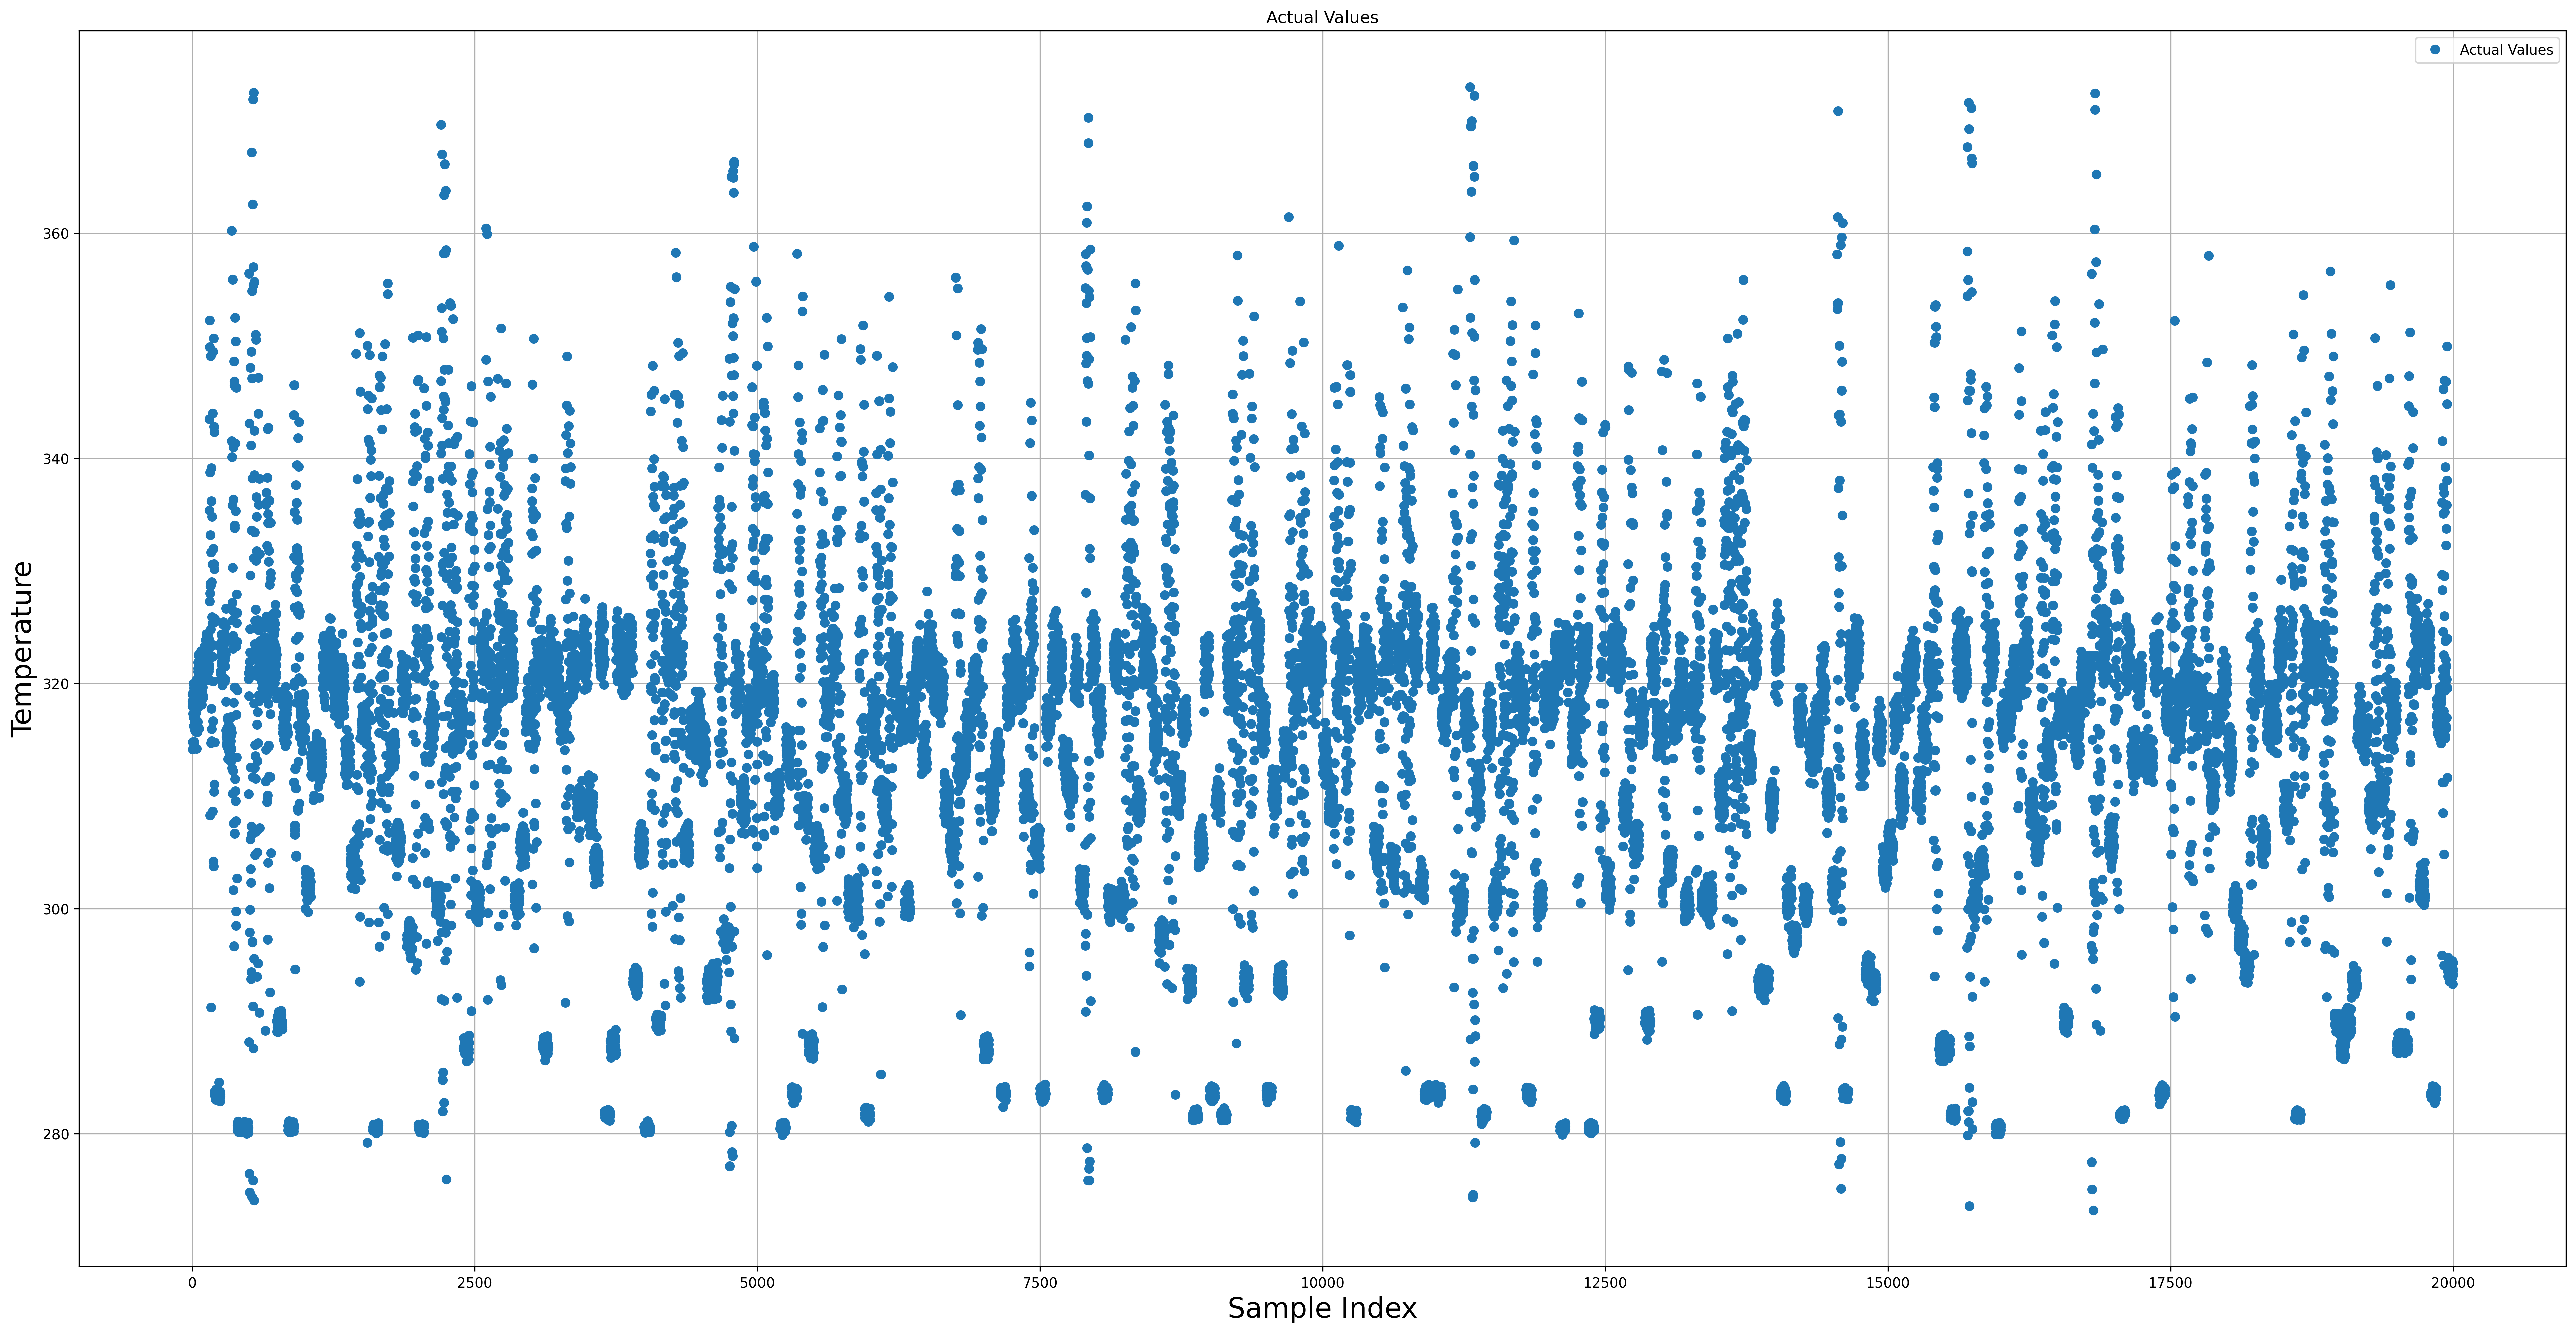

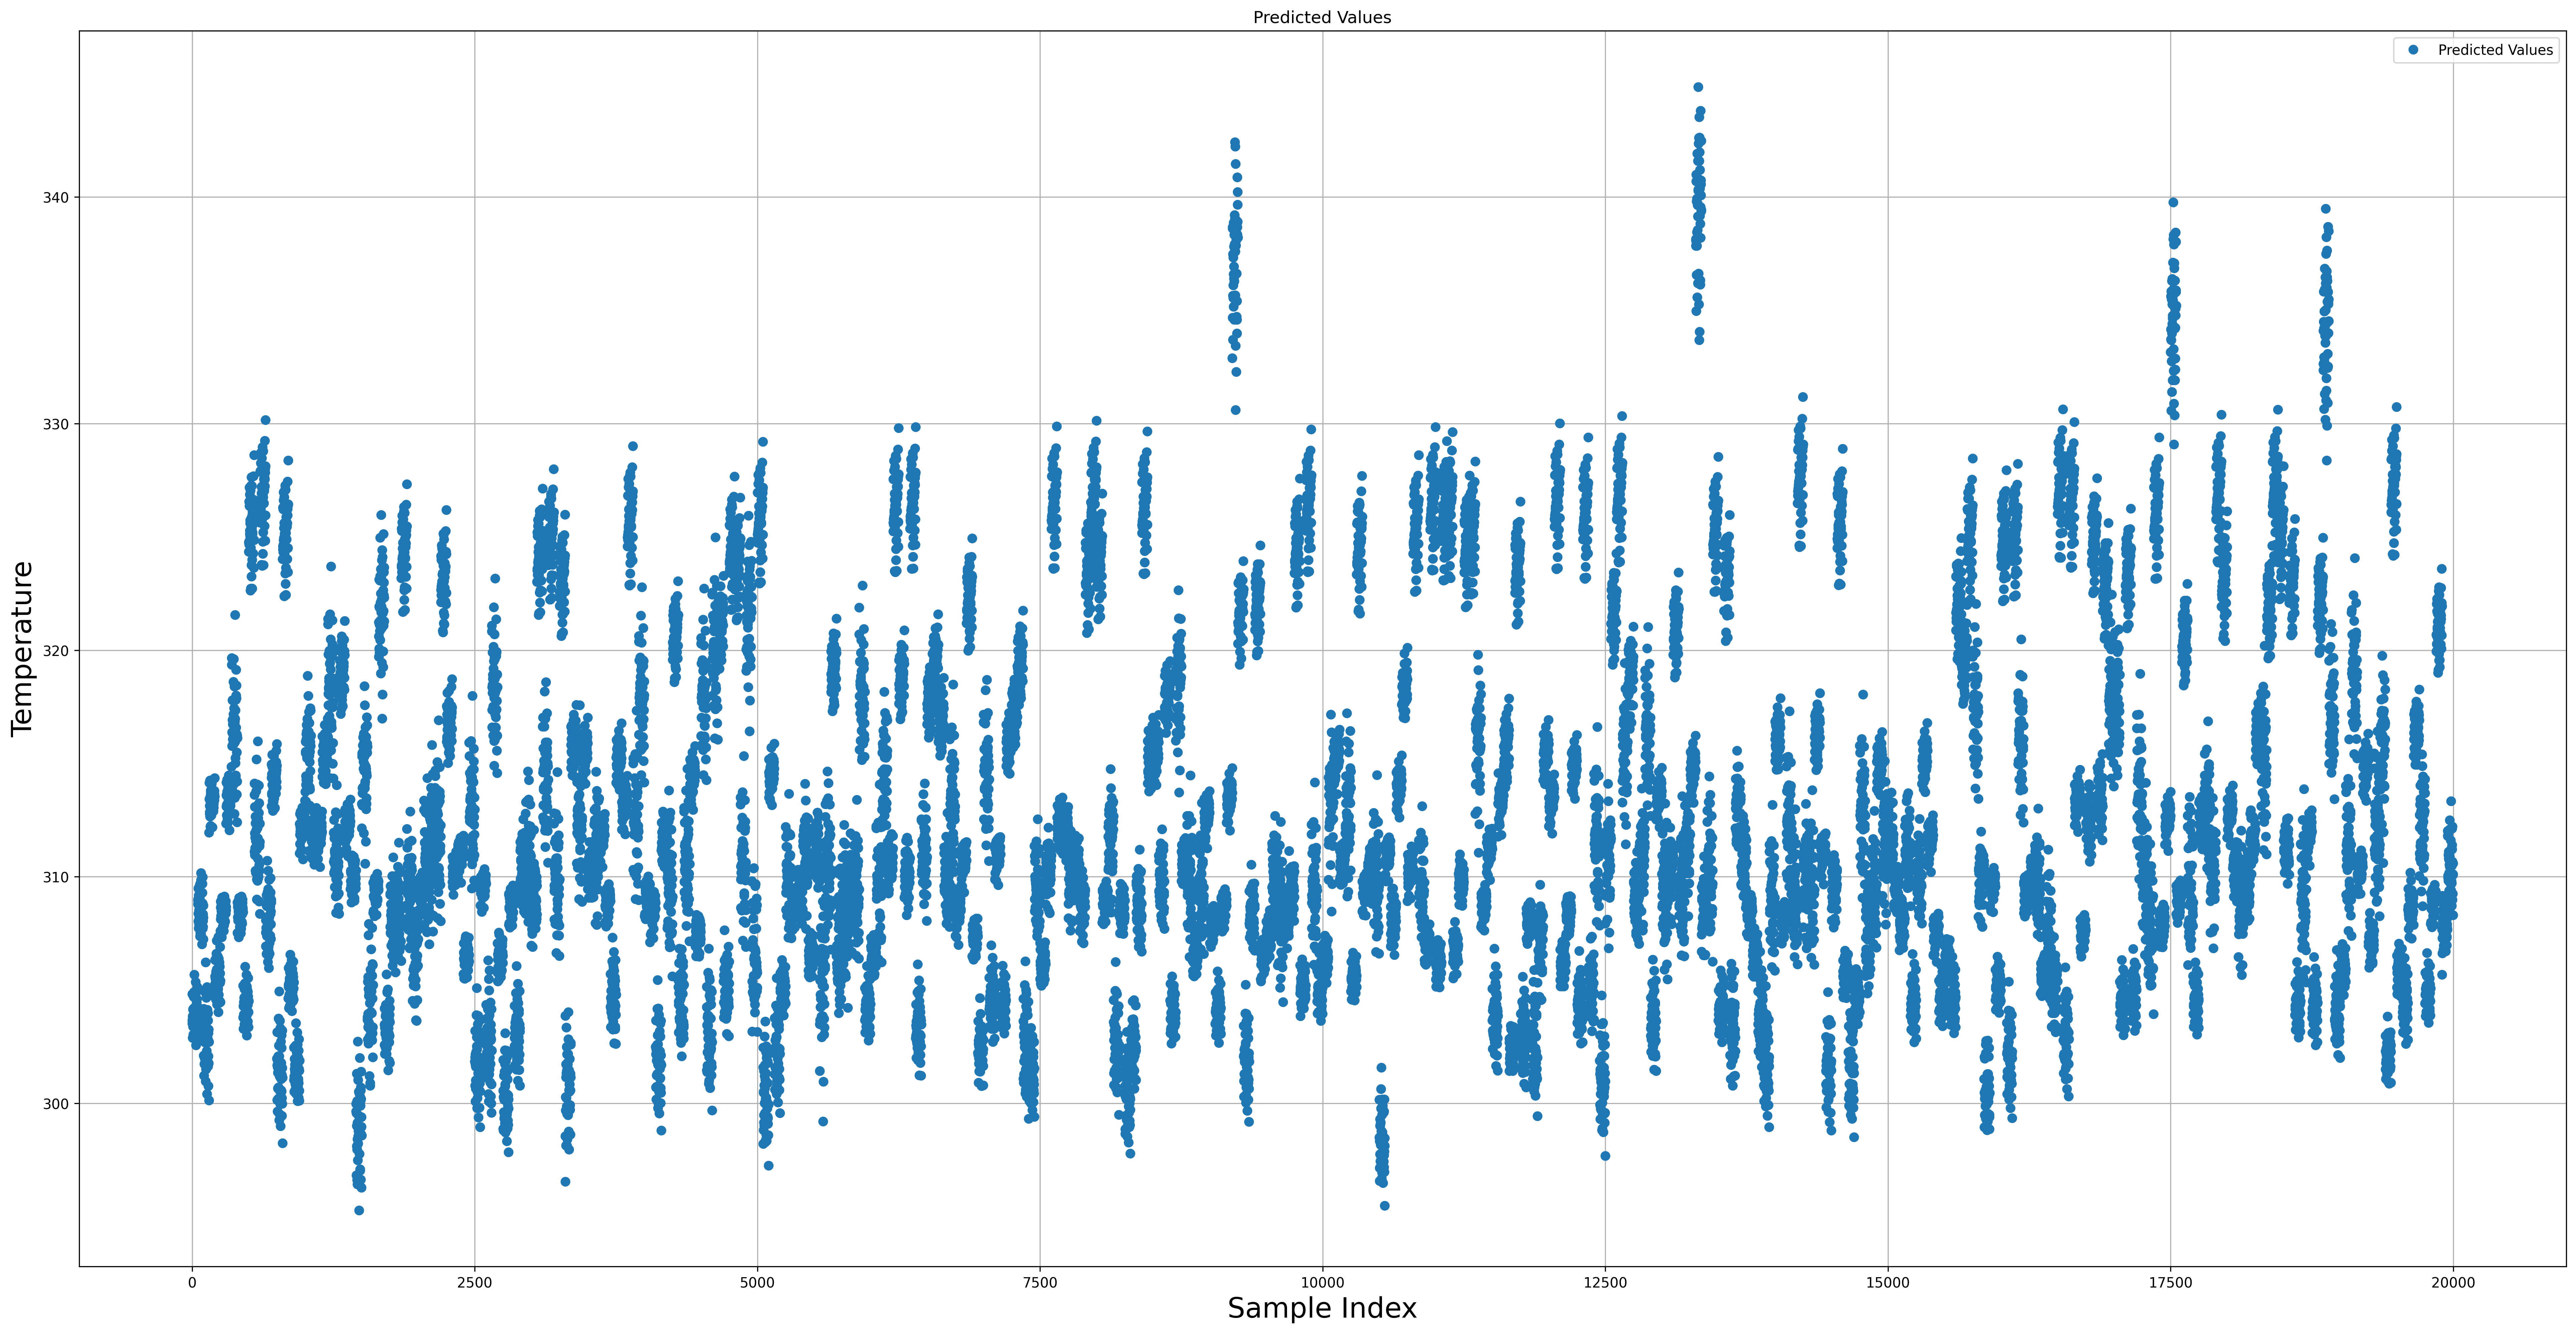

In [143]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted values against actual values

# Plot actual values
plt.subplots(figsize=(32,16), dpi=300)
plt.plot(y_test.values.flatten(), 'o', label='Actual Values')
plt.title('Actual Values')
plt.xlabel('Sample Index', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.legend()
plt.grid(True)

# Plot predicted values
plt.subplots(figsize=(32,16), dpi=300)
plt.plot(y_pred.flatten(), 'o', label='Predicted Values')
plt.title('Predicted Values')
plt.xlabel('Sample Index', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

/Users/kevinli/Desktop/sr2024/UNT-Thermography-24/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 3, 69, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 1, 34, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 1, 34, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 1088)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_406 (Dense)               │ (None, 512)            │       557,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_407 (Dense)               │ (None, 50)             │        25,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_24 (Reshape)            │ (None, 5, 10)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 583,538 (2.23 MB)

 Trainable params: 583,538 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 97146.4922 - mae: 311.3377 - val_loss: 97534.1328 - val_mae: 312.0043 - learning_rate: 1.0000e-04
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97118.2578 - mae: 311.2912 - val_loss: 96757.8125 - val_mae: 310.7590 - learning_rate: 1.0000e-04
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96192.6484 - mae: 309.7992 - val_loss: 94508.7031 - val_mae: 307.1121 - learning_rate: 1.0000e-04
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93169.1328 - mae: 304.8745 - val_loss: 89843.5859 - val_mae: 299.3647 - learning_rate: 1.0000e-04
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88195.3125 - mae: 296.5263 - val_loss: 82099.5469 - val_mae: 285.9077 - learning_rate: 1.0000e-04
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79541.8047 - mae: 281.2858 - val_loss: 71338.9922 - val_mae: 265.7732 - learning_rate: 1.0000e-04
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

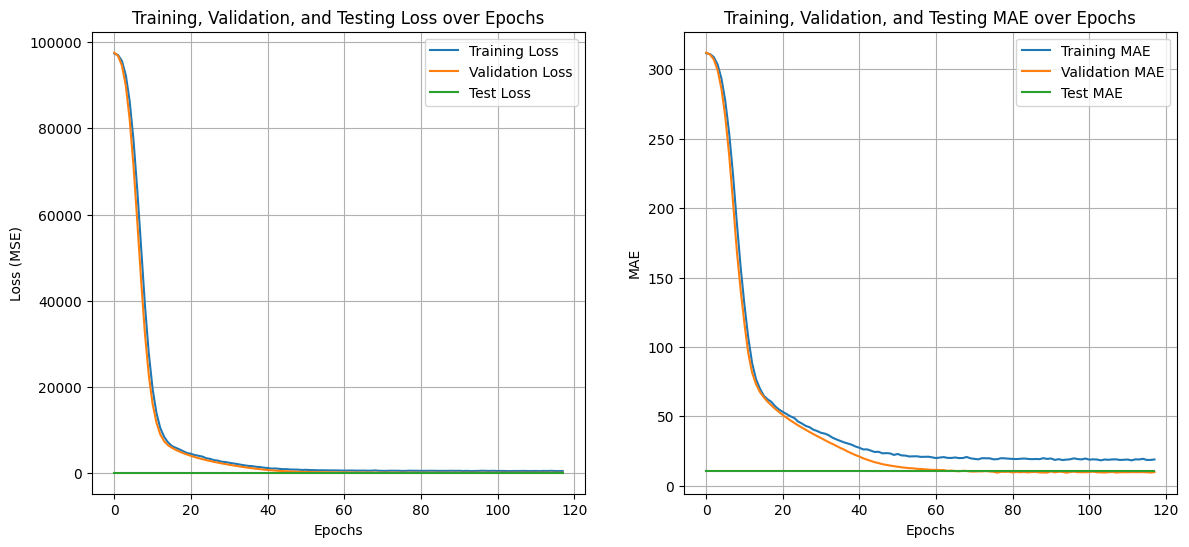

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[[310.748  , 311.37354, 311.34436, ..., 310.8656 , 311.6414 ,
         311.25763],
        [310.72873, 310.5366 , 310.9104 , ..., 310.74753, 311.22064,
         311.19223],
        [310.35626, 311.45523, 310.97156, ..., 311.47833, 310.81842,
         310.81644],
        [310.36285, 310.72058, 310.3839 , ..., 311.1401 , 311.39874,
         311.00626],
        [311.08084, 311.44586, 310.92444, ..., 311.0502 , 311.45383,
         311.66043]],

       [[300.9181 , 301.12973, 301.72556, ..., 300.78522, 301.86755,
         301.22876],
        [301.0486 , 300.74237, 300.86304, ..., 301.22876, 301.1214 ,
         301.58066],
        [300.86627, 302.30353, 301.37115, ..., 301.71573, 300.83752,
         301.27127],
        [300.7484 , 300.44992, 300.52234, ..., 301.02606, 301.40076,
         301.57513],
        [301.25784, 301.46848, 300.95532, ..., 301.25256, 301.83322,
         302.0933 ]],

       [[309.37192, 309.85318, 310.05176, ..., 309.41272, 310.2362 ,
         309.8777 ],
      

In [126]:
import scipy.io
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load .mat file
mat = scipy.io.loadmat('../UNT-Thermography-24/fused_silica_data/data_GaN_8_15micron_1.mat')

# Extract and reshape data
Temp_all = mat.get('T_GaN_random')

Spectra_all = mat.get('Spectrum')

# Convert to pandas DataFrame for convenience
pd_spectra = pd.DataFrame(spectra_line)
pd_temp = pd.DataFrame(temp_line)

# Select the data
X = pd_spectra
Y = pd_temp

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

# Reshape the input data from 5x71x2000 to 2000x5x71
X_reshaped = X_scaled_df.values.T.reshape(5, 71, 2000).transpose(2, 0, 1)

# Normalize the data
X_normalized = X_reshaped / np.max(X_reshaped)

# Add channel dimension for CNN (treating as a single-channel image)
X_cnn_input = X_normalized[..., np.newaxis]

# Reshape the target data
Y_reshaped = Y.values.T.reshape(5, 10, 2000).transpose(2, 0, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cnn_input, Y_reshaped, test_size=0.2, random_state=1337)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1337)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(5, 71, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Reshape((5, 10))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Print training metrics
print(f"train_MSE: {history.history['loss']}")
print(f"train_MAE: {history.history.get('mae', None)}")

# Evaluate the model on the validation set
validation_loss, validation_mae = model.evaluate(X_val, y_val)
print(f"val_MSE: {validation_loss}, val_MAE: {validation_mae}")

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"test_MSE: {test_loss}, test_MAE: {test_mae}")

# Add test metrics to the history for plotting
history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_mae'] = [test_mae] * len(history.history['mae'])

# Plot training & validation loss and mae values
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.plot(history.history["test_loss"], label='Test Loss')
plt.title('Training, Validation, and Testing Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.plot(history.history["test_mae"], label="Test MAE")
plt.title('Training, Validation, and Testing MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()

y_pred = model.predict(X_test)
# y_pred


In [127]:
y_pred.shape

(400, 5, 10)